In [1]:
import os
%pylab inline 
import tensorflow as tf
import DifferentiableHOS as DHOS
import astropy.units as u
import pickle
from scipy import ndimage, misc
import os
from matplotlib import gridspec
import cmasher as cmr
import matplotlib.colors as colors

Populating the interactive namespace from numpy and matplotlib


In [2]:
field_size=5.
field_npix=1024
z_source=[0.255,0.462,0.462,0.914,1.302]

In [3]:
m_array=[]
for filename in os.listdir("/global/cscratch1/sd/dlan/maps_z_SRD/"):
        f=open(os.path.join('/global/cscratch1/sd/dlan/maps_z_SRD/', filename), 'rb')
        res =pickle.load(f)
        km=res['kmap']
        f.close()
        m_array.append(km)
            


In [4]:
####
#S7
####
ps_S7=[]
for i in range(len(m_array)):
    l,p=DHOS.statistics.power_spectrum(m_array[i][0][0],field_size,field_npix) 
    ps_S7.append(p)
####
#S12
####
ps_S12=[]
for i in range(len(m_array)):
    l,p=DHOS.statistics.power_spectrum(m_array[i][1][0],field_size,field_npix) 
    ps_S12.append(p)
####
#S16
####  
ps_S16=[]
for i in range(len(m_array)):
    l,p=DHOS.statistics.power_spectrum(m_array[i][2][0],field_size,field_npix) 
    ps_S16.append(p)
####
#S21
#### 
ps_S21=[]
for i in range(len(m_array)):
    l,p=DHOS.statistics.power_spectrum(m_array[i][3][0],field_size,field_npix) 
    ps_S21.append(p)
####
#S27
####   
ps_S27=[]
for i in range(len(m_array)):
    l,p=DHOS.statistics.power_spectrum(m_array[i][4][0],field_size,field_npix) 
    ps_S27.append(p)


In [5]:
mups_DLL_S7=np.mean(ps_S7,axis=0)
mups_DLL_S12=np.mean(ps_S12,axis=0)
mups_DLL_S16=np.mean(ps_S16,axis=0)
mups_DLL_S21=np.mean(ps_S21,axis=0)
mups_DLL_S27=np.mean(ps_S27,axis=0)
stdps_DLL_S7=np.std(ps_S7,axis=0)
stdps_DLL_S12=np.std(ps_S12,axis=0)
stdps_DLL_S16=np.std(ps_S16,axis=0)
stdps_DLL_S21=np.std(ps_S21,axis=0)
stdps_DLL_S27=np.std(ps_S27,axis=0)

## Comparison to kappa TNG

For comparison we use maps from the kappa TNG simulations at the following redshift:

 S7=0.255 
 
 S12=0.462
 
 S16=0.648
 
 S21=0.914
 
 S27=1.302

In [6]:
#S7
kTNG_S7=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa07.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S7.append(kappaTNG)
#S12
kTNG_S12=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa12.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S12.append(kappaTNG)
#S16
kTNG_S16=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa16.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S16.append(kappaTNG)
#S21
kTNG_S21=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa21.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S21.append(kappaTNG)
#S27
kTNG_S27=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa27.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S27.append(kappaTNG)

In [7]:
####
#S7
####
ps_kTNG_S7=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S7[i],field_size,field_npix)
    ps_kTNG_S7.append(ps)
####
#S12
####
ps_kTNG_S12=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S12[i],field_size,field_npix)
    ps_kTNG_S12.append(ps)
####
#S16
####
ps_kTNG_S16=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S16[i],field_size,field_npix)
    ps_kTNG_S16.append(ps)
####
#S21
####
ps_kTNG_S21=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S21[i],field_size,field_npix)
    ps_kTNG_S21.append(ps)
####
#S27
####
ps_kTNG_S27=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S27[i],field_size,field_npix)
    ps_kTNG_S27.append(ps)


In [8]:
mups_kTNG_S7=np.mean(ps_kTNG_S7,axis=0)
mups_kTNG_S12=np.mean(ps_kTNG_S12,axis=0)
mups_kTNG_S16=np.mean(ps_kTNG_S16,axis=0)
mups_kTNG_S21=np.mean(ps_kTNG_S21,axis=0)
mups_kTNG_S27=np.mean(ps_kTNG_S27,axis=0)

In [9]:
#S7
kTNG_S7_b=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Hydro',  filename+"/run001/kappa07.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S7_b.append(kappaTNG)
#S12
kTNG_S12_b=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Hydro',  filename+"/run001/kappa12.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S12_b.append(kappaTNG)
#S16
kTNG_S16_b=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Hydro',  filename+"/run001/kappa16.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S16_b.append(kappaTNG)
#S21
kTNG_S21_b=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Hydro',  filename+"/run001/kappa21.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S21_b.append(kappaTNG)
#S27
kTNG_S27_b=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Hydro',  filename+"/run001/kappa27.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S27_b.append(kappaTNG)

In [10]:
####
#S7
####
ps_kTNG_S7_b=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S7_b[i],field_size,field_npix)
    ps_kTNG_S7_b.append(ps)
####
#S12
####
ps_kTNG_S12_b=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S12_b[i],field_size,field_npix)
    ps_kTNG_S12_b.append(ps)
####
#S16
####
ps_kTNG_S16_b=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S16_b[i],field_size,field_npix)
    ps_kTNG_S16_b.append(ps)
####
#S21
####
ps_kTNG_S21_b=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S21_b[i],field_size,field_npix)
    ps_kTNG_S21_b.append(ps)
####
#S27
####
ps_kTNG_S27_b=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S27_b[i],field_size,field_npix)
    ps_kTNG_S27_b.append(ps)


In [11]:
mups_kTNG_S7_b=np.mean(ps_kTNG_S7_b,axis=0)
mups_kTNG_S12_b=np.mean(ps_kTNG_S12_b,axis=0)
mups_kTNG_S16_b=np.mean(ps_kTNG_S16_b,axis=0)
mups_kTNG_S21_b=np.mean(ps_kTNG_S21_b,axis=0)
mups_kTNG_S27_b=np.mean(ps_kTNG_S27_b,axis=0)



stdps_kTNG_S7_b=np.std(ps_kTNG_S7_b,axis=0)
stdps_kTNG_S12_b=np.std(ps_kTNG_S12_b,axis=0)
stdps_kTNG_S16_b=np.std(ps_kTNG_S16_b,axis=0)
stdps_kTNG_S21_b=np.std(ps_kTNG_S21_b,axis=0)
stdps_kTNG_S27_b=np.std(ps_kTNG_S27_b,axis=0)


In [12]:

cmap = cmr.pride
col = cmr.pride(np.linspace(0.,1,6))   
#col = cmr.eclipse([0.,0,0.55,0.85]) 

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0., vmax=1))


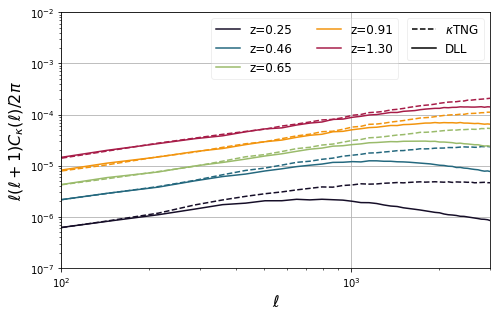

In [76]:
fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(111)
a,=loglog(l, l*(l+1)*mups_kTNG_S7/(2*np.pi),'--',color=col[0])
loglog(l, l*(l+1)*mups_kTNG_S12/(2*np.pi),'--',color=col[1])
loglog(l, l*(l+1)*mups_kTNG_S16/(2*np.pi),'--',color=col[2])
loglog(l, l*(l+1)*mups_kTNG_S21/(2*np.pi),'--',color=col[3])
loglog(l, l*(l+1)*mups_kTNG_S27/(2*np.pi),'--',color=col[4])

b,=loglog(l, l*(l+1)*mups_DLL_S7/(2*np.pi), label='z=0.25',color=col[0])
loglog(l, l*(l+1)*mups_DLL_S12/(2*np.pi),label='z=0.46',color=col[1])
loglog(l, l*(l+1)*mups_DLL_S16/(2*np.pi),label='z=0.65',color=col[2])
loglog(l, l*(l+1)*mups_DLL_S21/(2*np.pi),label='z=0.91',color=col[3])
loglog(l, l*(l+1)*mups_DLL_S27/(2*np.pi),label='z=1.30',color=col[4])
ylabel('$\ell(\ell+1)C_{\kappa}(\ell) /2\pi$',fontsize=16)
plt.grid(True)
xscale('log')
xlim(1e2,3e3)
ylim(1e-7,1e-2)
xlabel('$\ell$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()


leg1 = ax.legend(loc='upper right',fontsize='large',bbox_to_anchor=(0.8, 1.),ncol=2,framealpha=0.3)
leg2 = ax.legend([a,b],['$\kappa$TNG', 'DLL'],loc='upper right',fontsize='large',framealpha=0.3)
leg = ax.get_legend()
[leg2.set_color('black') for leg2 in leg.legendHandles]
ax.add_artist(leg1)


#plt.savefig('../figures/cls_DLL_vs_ktng.pdf',bbox_inches='tight')

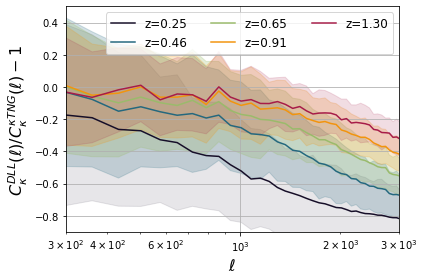

In [54]:
fig, ax = plt.subplots()
plt.semilogx(l,mups_DLL_S7/mups_kTNG_S7-1, label='z=0.25',color=col[0])
plt.semilogx(l,mups_DLL_S12/mups_kTNG_S12-1, label='z=0.46',color=col[1])
plt.semilogx(l,mups_DLL_S16/mups_kTNG_S16-1, label='z=0.65',color=col[2])
plt.semilogx(l,mups_DLL_S21/mups_kTNG_S21-1, label='z=0.91',color=col[3])
plt.semilogx(l,mups_DLL_S27/mups_kTNG_S27-1, label='z=1.30',color=col[4])
plt.grid(True)
xlim(3e2,3e3)
ylim(-0.9,0.5)
ax.fill_between(l, ((mups_DLL_S7/mups_kTNG_S7)-1)-(stdps_DLL_S7/mups_DLL_S7), ((mups_DLL_S7/mups_kTNG_S7)-1)+(stdps_DLL_S7/mups_DLL_S7), alpha=.1,color=col[0])
ax.fill_between(l, ((mups_DLL_S12/mups_kTNG_S12)-1)-(stdps_DLL_S12/mups_DLL_S12), ((mups_DLL_S12/mups_kTNG_S12)-1)+(stdps_DLL_S12/mups_DLL_S12), alpha=.2,color=col[1])
ax.fill_between(l, ((mups_DLL_S16/mups_kTNG_S16)-1)-(stdps_DLL_S16/mups_DLL_S16), ((mups_DLL_S16/mups_kTNG_S16)-1)+(stdps_DLL_S16/mups_DLL_S16), alpha=.25,color=col[2])
ax.fill_between(l, ((mups_DLL_S21/mups_kTNG_S21)-1)-(stdps_DLL_S21/mups_DLL_S21), ((mups_DLL_S21/mups_kTNG_S21)-1)+(stdps_DLL_S21/mups_DLL_S21), alpha=.2,color=col[3])
ax.fill_between(l, ((mups_DLL_S27/mups_kTNG_S27)-1)-(stdps_DLL_S27/mups_DLL_S27), ((mups_DLL_S27/mups_kTNG_S27)-1)+(stdps_DLL_S27/mups_DLL_S27), alpha=.15,color=col[4])
ylabel('$C_{\kappa}^{DLL}(\ell)/C_\kappa^{\kappa TNG}(\ell)-1$',fontsize=16)
xlabel('$\ell$',fontsize=16)
legend(fontsize='large',ncol=3,loc='upper right')
plt.tight_layout()
#plt.savefig('../figures/res_cls_DLL_vs_ktng.pdf',bbox_inches='tight')




In [31]:
((mups_DLL_S21/mups_kTNG_S21-1)*100)[2:14]

array([  7.9666257 ,  -1.0067582 ,   2.2724986 ,  -5.128956  ,
        -3.834629  ,   0.06881952,  -6.3430786 ,  -6.294191  ,
        -4.814732  , -10.891419  ,  -2.5213242 ,  -8.78129   ],
      dtype=float32)

In [35]:
((mups_DLL_S21/mups_kTNG_S21-1)*100)[14:28]

array([-11.432648, -10.006332, -13.725787, -13.359469, -12.930054,
       -14.220232, -17.169683, -16.57318 , -19.520092, -20.842869,
       -21.99648 , -21.435017, -22.635275, -23.272753], dtype=float32)

In [36]:
((mups_DLL_S21/mups_kTNG_S21-1)*100)[28:46]

array([-26.686478, -27.653933, -29.219162, -30.084341, -31.209433,
       -31.225813, -32.54041 , -34.74262 , -35.852726, -37.037838,
       -36.874954, -39.126556, -40.452213, -40.988224, -41.95336 ,
       -42.67468 , -45.26952 , -45.984566], dtype=float32)

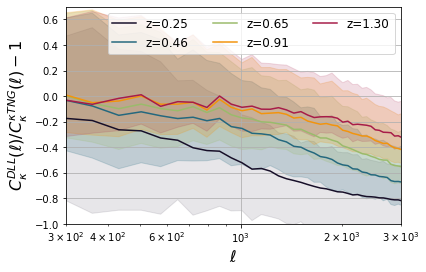

In [47]:
fig, ax = plt.subplots()
plt.semilogx(l,mups_DLL_S7/mups_kTNG_S7-1, label='z=0.25',color=col[0])
plt.semilogx(l,mups_DLL_S12/mups_kTNG_S12-1, label='z=0.46',color=col[1])
plt.semilogx(l,mups_DLL_S16/mups_kTNG_S16-1, label='z=0.65',color=col[2])
plt.semilogx(l,mups_DLL_S21/mups_kTNG_S21-1, label='z=0.91',color=col[3])
plt.semilogx(l,mups_DLL_S27/mups_kTNG_S27-1, label='z=1.30',color=col[4])
plt.grid(True)
xlim(3e2,3e3)
ylim(-1,0.7)
ax.fill_between(l, ((mups_DLL_S7/mups_kTNG_S7)-1)-(stdps_kTNG_S7_b/mups_kTNG_S7_b), ((mups_DLL_S7/mups_kTNG_S7)-1)+(stdps_kTNG_S7_b/mups_kTNG_S7_b), alpha=.1,color=col[0])
ax.fill_between(l, ((mups_DLL_S12/mups_kTNG_S12)-1)-(stdps_kTNG_S12_b/mups_kTNG_S12_b), ((mups_DLL_S12/mups_kTNG_S12)-1)+(stdps_kTNG_S7_b/mups_kTNG_S7_b), alpha=.2,color=col[1])
ax.fill_between(l, ((mups_DLL_S16/mups_kTNG_S16)-1)-(stdps_kTNG_S16_b/mups_kTNG_S16_b), ((mups_DLL_S16/mups_kTNG_S16)-1)+(stdps_kTNG_S7_b/mups_kTNG_S7_b), alpha=.2,color=col[2])
ax.fill_between(l, ((mups_DLL_S21/mups_kTNG_S21)-1)-(stdps_kTNG_S21_b/mups_kTNG_S21_b), ((mups_DLL_S21/mups_kTNG_S21)-1)+(stdps_kTNG_S7_b/mups_kTNG_S7_b), alpha=.2,color=col[3])
ax.fill_between(l, ((mups_DLL_S27/mups_kTNG_S27)-1)-(stdps_kTNG_S27_b/mups_kTNG_S27_b), ((mups_DLL_S27/mups_kTNG_S27)-1)+(stdps_kTNG_S7_b/mups_kTNG_S7_b), alpha=.15,color=col[4])

ylabel('$C_{\kappa}^{DLL}(\ell)/C_\kappa^{\kappa TNG}(\ell)-1$',fontsize=16)
xlabel('$\ell$',fontsize=16)
legend(fontsize='large',ncol=3,loc='upper right')
#plt.savefig('../figures/res_cls_DLL_vs_ktng_bary.pdf',bbox_inches='tight')

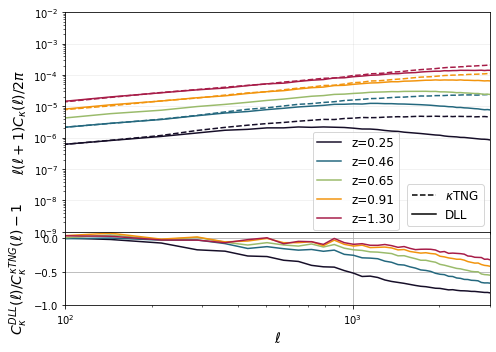

In [36]:

fig = plt.figure(figsize=(7, 5))

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1],hspace=0) 
ax0 = plt.subplot(gs[0])
a,=ax0.loglog(l, l*(l+1)*mups_kTNG_S7/(2*np.pi),'--',color=col[0])
ax0.loglog(l, l*(l+1)*mups_kTNG_S12/(2*np.pi),'--',color=col[1])
#ax0.loglog(l, l*(l+1)*mups_kTNG_S16/(2*np.pi),'--',color=col[2])
ax0.loglog(l, l*(l+1)*mups_kTNG_S21/(2*np.pi),'--',color=col[3])
ax0.loglog(l, l*(l+1)*mups_kTNG_S27/(2*np.pi),'--',color=col[4])
ax0.loglog(l, l*(l+1)*mups_DLL_S7/(2*np.pi), label='z=0.25',color=col[0])
b,=ax0.loglog(l, l*(l+1)*mups_DLL_S12/(2*np.pi),label='z=0.46',color=col[1])
ax0.loglog(l, l*(l+1)*mups_DLL_S16/(2*np.pi),label='z=0.65',color=col[2])
ax0.loglog(l, l*(l+1)*mups_DLL_S21/(2*np.pi),label='z=0.91',color=col[3])
ax0.loglog(l, l*(l+1)*mups_DLL_S27/(2*np.pi),label='z=1.30',color=col[4])
ax0.set_xlim(1e2,3e3)
ax0.set_ylim(1e-9,1e-2)
ax0.label_outer()
ax0.grid(True,alpha=.2)
ax0.set_ylabel('$\ell(\ell+1)C_{\kappa}(\ell) /2\pi$',fontsize=14)


leg1 = ax0.legend(loc='lower right',fontsize='large',bbox_to_anchor=(0.8, -0.02),)
leg2 = ax0.legend([a,b],['$\kappa$TNG', 'DLL'],loc='lower right',fontsize='large')
leg = ax0.get_legend()
[leg2.set_color('black') for leg2 in leg.legendHandles]
ax0.add_artist(leg1)

ax1 = plt.subplot(gs[1])
ax1.grid(True)
ax1.semilogx(l,mups_DLL_S7/mups_kTNG_S7-1, label='z=0.25',color=col[0])
ax1.semilogx(l,mups_DLL_S12/mups_kTNG_S12-1, label='z=0.46',color=col[1])
ax1.semilogx(l,mups_DLL_S16/mups_kTNG_S16-1, label='z=0.65',color=col[2])
ax1.semilogx(l,mups_DLL_S21/mups_kTNG_S21-1, label='z=0.91',color=col[3])
ax1.semilogx(l,mups_DLL_S27/mups_kTNG_S27-1, label='z=1.30',color=col[4])
# ax1.fill_between(l, y_corr-ci/ps_kTNG_mean_smooth, y_corr+ci/ps_kTNG_mean_smooth, alpha=.1,color=col[3])
# ax1.fill_between(l, y_nocorr-ci/ps_kTNG_mean_smooth, y_nocorr+ci/ps_kTNG_mean_smooth, alpha=.1,color=col[0])
ax1.set_xscale('log')
ax1.set_xlim(1e2,3e3)
ax1.set_ylabel('$C_{\kappa}^{DLL}(\ell)/C_\kappa^{\kappa TNG}(\ell)-1$',fontsize=14)
ax1.set_xlabel('$\ell$',fontsize=14)
ax1.set_ylim(-1,0.1)
plt.tight_layout()
plt.savefig('../figures/cls_res_cls_DLL_vs_ktng.pdf')